In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

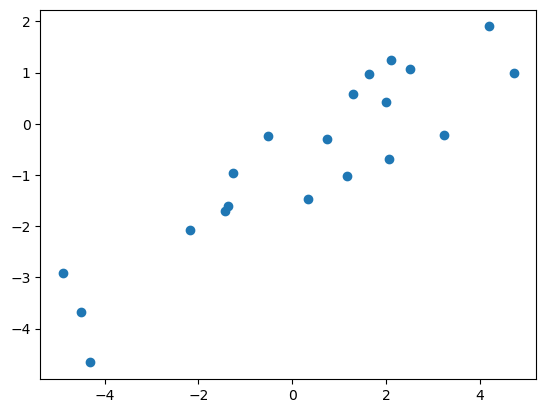

In [33]:
# generate 20 X,Y coordinates where Y=0.5*X-1 + gaussian noise with X between -5 and 5
N=20
X = np.random.random(N)*10-5
Y = 0.5 * X - 1 + np.random.randn(N)
plt.scatter(X,Y)

In [34]:
# create a linear regression model with pytorch
# The parameters 1,1 indicate the dimensions of input and output (nx1) and (nx1)
model = nn.Linear(1,1)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# reshape X and Y to fit the model
X=X.reshape(N,1)
Y=Y.reshape(N,1)

# convert np matrixes into torch tensors
# remember that np creates float64 by default, but pytorch uses float32 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

type(inputs)

torch.Tensor

In [35]:
# train the model in pytorch with 30 epochs
n_epochs = 30
losses=[]
for epoch in range(n_epochs):
    #zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # append loss to a list of losses
    losses.append(loss.item())

    # Backward pass
    loss.backward()
    optimizer.step()

    # print the loss
    print('Epoch {}/{} | Loss: {:.4f}'.format(epoch + 1, n_epochs, loss.item()))


Epoch 1/30 | Loss: 2.8685
Epoch 2/30 | Loss: 1.4779
Epoch 3/30 | Loss: 1.0053
Epoch 4/30 | Loss: 0.8034
Epoch 5/30 | Loss: 0.6983
Epoch 6/30 | Loss: 0.6366
Epoch 7/30 | Loss: 0.5983
Epoch 8/30 | Loss: 0.5741
Epoch 9/30 | Loss: 0.5585
Epoch 10/30 | Loss: 0.5485
Epoch 11/30 | Loss: 0.5421
Epoch 12/30 | Loss: 0.5380
Epoch 13/30 | Loss: 0.5353
Epoch 14/30 | Loss: 0.5336
Epoch 15/30 | Loss: 0.5325
Epoch 16/30 | Loss: 0.5318
Epoch 17/30 | Loss: 0.5313
Epoch 18/30 | Loss: 0.5310
Epoch 19/30 | Loss: 0.5308
Epoch 20/30 | Loss: 0.5307
Epoch 21/30 | Loss: 0.5306
Epoch 22/30 | Loss: 0.5306
Epoch 23/30 | Loss: 0.5306
Epoch 24/30 | Loss: 0.5305
Epoch 25/30 | Loss: 0.5305
Epoch 26/30 | Loss: 0.5305
Epoch 27/30 | Loss: 0.5305
Epoch 28/30 | Loss: 0.5305
Epoch 29/30 | Loss: 0.5305
Epoch 30/30 | Loss: 0.5305


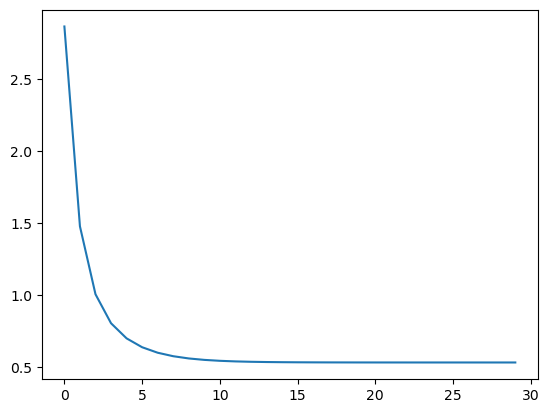

In [36]:
#plot losses
plt.plot(losses, label='loss')

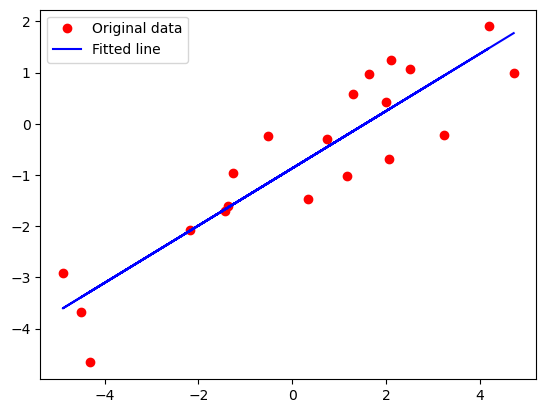

In [39]:
#plot the original data and the fitted line together
#if .detach() is not called, an error will be generated
predicted = model(inputs).detach().numpy()
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, predicted, 'b-', label='Fitted line')
plt.legend(loc='upper left')
plt.show()

In [42]:
#the error won't show up if the gradients are detached first
with torch.no_grad():
    out=model(inputs).numpy()

out


array([[ 1.7716266 ],
       [ 0.04126602],
       [ 0.30511856],
       [-0.45607215],
       [ 1.4715675 ],
       [ 0.53428817],
       [ 0.2513318 ],
       [-3.286059  ],
       [-1.6688855 ],
       [ 0.9368074 ],
       [-1.1640005 ],
       [-3.3945045 ],
       [-1.5733051 ],
       [-0.6783538 ],
       [-3.6063762 ],
       [-0.1421575 ],
       [-0.22045964],
       [-1.6371272 ],
       [ 0.27867937],
       [-2.0829723 ]], dtype=float32)

In [43]:
# Inspect the parameters of the model
w= model.weight.data.numpy()
b= model.bias.data.numpy()
#print values
print("w=", w)
print("b=", b)
#notice that these values are close to the actual values w=0.5 and b=-1
#this shows that the model has fitted correctly

w= [[0.5594256]]
b= [-0.870345]
